<center><h1><strong>COVID-19 Data Analysis Project</strong></h1></center>

## **1. Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

## **2. Loading the Dataset**

In [5]:
df_cases = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

## **3. Data Cleaning and Processing**


In [7]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [8]:
df_cases.shape

(289, 1147)

In [9]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [10]:
df_deaths.shape

(289, 1147)

In [11]:
#Check If They Match (Columns & Rows)
print(df_cases.shape, df_deaths.shape)  # Check dimensions
# Check if datasets have the same column names (except for the first column 'Country/Region')
print(df_cases.columns.equals(df_deaths.columns))  

# Check if the country names match in both datasets
print(df_cases['Country/Region'].equals(df_deaths['Country/Region'])) 

(289, 1147) (289, 1147)
True
True


In [12]:
# Extract the date column names (starting from index 4)
date_columns_cases = df_cases.columns[4:]
date_columns_deaths = df_deaths.columns[4:]

# Convert the date column names to datetime format
date_columns_cases = pd.to_datetime(date_columns_cases, format='%m/%d/%y', errors='coerce')
date_columns_deaths = pd.to_datetime(date_columns_deaths, format='%m/%d/%y', errors='coerce')

# Reassign the cleaned date columns back to the DataFrame
df_cases.columns = list(df_cases.columns[:4]) + list(date_columns_cases)
df_deaths.columns = list(df_deaths.columns[:4]) + list(date_columns_deaths)

# Check the column names after conversion
df_cases.columns
df_deaths.columns

Index([   'Province/State',    'Country/Region',               'Lat',
                    'Long', 2020-01-22 00:00:00, 2020-01-23 00:00:00,
       2020-01-24 00:00:00, 2020-01-25 00:00:00, 2020-01-26 00:00:00,
       2020-01-27 00:00:00,
       ...
       2023-02-28 00:00:00, 2023-03-01 00:00:00, 2023-03-02 00:00:00,
       2023-03-03 00:00:00, 2023-03-04 00:00:00, 2023-03-05 00:00:00,
       2023-03-06 00:00:00, 2023-03-07 00:00:00, 2023-03-08 00:00:00,
       2023-03-09 00:00:00],
      dtype='object', length=1147)

In [13]:
# Check the Province column for zero or missing value
print("Missing or 0 values in 'Province' column (Cases Dataset):", ((df_cases['Province/State'].isna()) | (df_cases['Province/State'] == 0)).sum())
print("Missing or 0 values in 'Province' column (Deaths Dataset):", ((df_deaths['Province/State'].isna()) | (df_deaths['Province/State'] == 0)).sum())

Missing or 0 values in 'Province' column (Cases Dataset): 198
Missing or 0 values in 'Province' column (Deaths Dataset): 198


In [14]:
# Drop columns that are not necessary (Province/State, Lat, Long)
df_cases_cleaned = df_cases.drop(columns=["Province/State", "Lat", "Long"])
df_deaths_cleaned = df_deaths.drop(columns=["Province/State", "Lat", "Long"])

In [15]:
df_deaths_cleaned.shape

(289, 1144)

In [16]:
df_cases_cleaned.shape

(289, 1144)

In [17]:
print(df_cases_cleaned['Country/Region'].nunique())  # Unique country names in cases dataset
print(df_deaths_cleaned['Country/Region'].nunique()) # Unique country names in deaths dataset

201
201


In [18]:
#merging 2 datasets to one
df = df_cases_cleaned.groupby("Country/Region", as_index=False).sum().merge(
    df_deaths_cleaned.groupby("Country/Region", as_index=False).sum(),
    on="Country/Region",
    suffixes=("_cases", "_deaths"))

# Check the final dataset shape
print(f"Shape of merged DataFrame: {df.shape}")


Shape of merged DataFrame: (201, 2287)


In [19]:
df.head()

,Country/Region,2020-01-22 00:00:00_cases,2020-01-23 00:00:00_cases,2020-01-24 00:00:00_cases,2020-01-25 00:00:00_cases,2020-01-26 00:00:00_cases,2020-01-27 00:00:00_cases,2020-01-28 00:00:00_cases,2020-01-29 00:00:00_cases,2020-01-30 00:00:00_cases,...,2023-02-28 00:00:00_deaths,2023-03-01 00:00:00_deaths,2023-03-02 00:00:00_deaths,2023-03-03 00:00:00_deaths,2023-03-04 00:00:00_deaths,2023-03-05 00:00:00_deaths,2023-03-06 00:00:00_deaths,2023-03-07 00:00:00_deaths,2023-03-08 00:00:00_deaths,2023-03-09 00:00:00_deaths
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [20]:
# Check for Missing Values in All Columns
df.isnull().sum()

Country/Region                0
2020-01-22 00:00:00_cases     0
2020-01-23 00:00:00_cases     0
2020-01-24 00:00:00_cases     0
2020-01-25 00:00:00_cases     0
                             ..
2023-03-05 00:00:00_deaths    0
2023-03-06 00:00:00_deaths    0
2023-03-07 00:00:00_deaths    0
2023-03-08 00:00:00_deaths    0
2023-03-09 00:00:00_deaths    0
Length: 2287, dtype: int64

In [21]:
# Rename key column for easier use
df = df.rename(columns={'Country/Region': 'Country'})

**Data Transformation (Monthly Aggregation)**


In [23]:
# Identify columns for cases and deaths
cases_cols = [col for col in df.columns if '_cases' in col]
deaths_cols = [col for col in df.columns if '_deaths' in col]
non_date_cols = [col for col in df.columns if col not in cases_cols + deaths_cols]

def get_last_day_of_month(df, columns, suffix):
    """Extracts the last day's value of each month and ensures correct naming."""
    monthly_dict = {}

    for col in columns:
        date_str = col.split('_')[0]  # Extract date part
        date = pd.to_datetime(date_str)  # Convert to datetime
        month_key = date.strftime('%b%Y')  # Format as 'Jan2020'

        # Ensure we always take the last non-null value
        if month_key not in monthly_dict:
            monthly_dict[month_key] = df[col]
        else:
            monthly_dict[month_key] = df[col]  # Overwrite with latest data

    # Convert to DataFrame and rename columns with suffix
    monthly_df = pd.DataFrame(monthly_dict)
    monthly_df.columns = [f"{col}_{suffix}" for col in monthly_df.columns]

    return monthly_df

# Get last available value for cases & deaths per month
cases_monthly = get_last_day_of_month(df, cases_cols, 'cases')
deaths_monthly = get_last_day_of_month(df, deaths_cols, 'deaths')

# Combine all parts correctly
new_df = pd.concat([df[non_date_cols], cases_monthly, deaths_monthly], axis=1)

# Sort the monthly columns correctly
monthly_cols = [col for col in new_df.columns if col not in non_date_cols]
sorted_monthly_cols = sorted(monthly_cols, key=lambda x: pd.to_datetime(x.split('_')[0], format='%b%Y'))
new_df = new_df[non_date_cols + sorted_monthly_cols]

# Save the cleaned dataset
new_df.to_csv("cleaned_covid19_data.csv", index=False)


In [24]:
new_df.head()

,Country,Jan2020_cases,Jan2020_deaths,Feb2020_cases,Feb2020_deaths,Mar2020_cases,Mar2020_deaths,Apr2020_cases,Apr2020_deaths,May2020_cases,...,Nov2022_cases,Nov2022_deaths,Dec2022_cases,Dec2022_deaths,Jan2023_cases,Jan2023_deaths,Feb2023_cases,Feb2023_deaths,Mar2023_cases,Mar2023_deaths
0,Afghanistan,0,0,5,0,166,4,1827,60,15180,...,205907,7833,207559,7849,208545,7882,209322,7896,209451,7896
1,Albania,0,0,0,0,243,15,773,31,1137,...,333343,3594,333806,3595,334167,3596,334391,3598,334457,3598
2,Algeria,0,0,1,0,716,44,4006,450,9394,...,271090,6881,271228,6881,271378,6881,271441,6881,271496,6881
3,Andorra,0,0,0,0,376,12,745,42,764,...,47219,157,47751,165,47839,165,47866,165,47890,165
4,Angola,0,0,0,0,7,2,27,2,86,...,104676,1924,105095,1930,105184,1931,105255,1933,105288,1933


In [25]:
new_df.shape

(201, 79)

In [26]:
new_df.columns

Index(['Country', 'Jan2020_cases', 'Jan2020_deaths', 'Feb2020_cases',
       'Feb2020_deaths', 'Mar2020_cases', 'Mar2020_deaths', 'Apr2020_cases',
       'Apr2020_deaths', 'May2020_cases', 'May2020_deaths', 'Jun2020_cases',
       'Jun2020_deaths', 'Jul2020_cases', 'Jul2020_deaths', 'Aug2020_cases',
       'Aug2020_deaths', 'Sep2020_cases', 'Sep2020_deaths', 'Oct2020_cases',
       'Oct2020_deaths', 'Nov2020_cases', 'Nov2020_deaths', 'Dec2020_cases',
       'Dec2020_deaths', 'Jan2021_cases', 'Jan2021_deaths', 'Feb2021_cases',
       'Feb2021_deaths', 'Mar2021_cases', 'Mar2021_deaths', 'Apr2021_cases',
       'Apr2021_deaths', 'May2021_cases', 'May2021_deaths', 'Jun2021_cases',
       'Jun2021_deaths', 'Jul2021_cases', 'Jul2021_deaths', 'Aug2021_cases',
       'Aug2021_deaths', 'Sep2021_cases', 'Sep2021_deaths', 'Oct2021_cases',
       'Oct2021_deaths', 'Nov2021_cases', 'Nov2021_deaths', 'Dec2021_cases',
       'Dec2021_deaths', 'Jan2022_cases', 'Jan2022_deaths', 'Feb2022_cases',
      

## **4. Data Analysis**


In [28]:
# Get the last available month's columns for cases & deaths
last_month_cases = new_df.iloc[:, -2]  # Second last column (Cases)
last_month_deaths = new_df.iloc[:, -1]  # Last column (Deaths)

# Calculate Death Rate using only the last recorded month's data
new_df['Death_Rate'] = (last_month_deaths / last_month_cases) * 100

# Convert to percentage format (optional)
new_df["Death_Rate"] = new_df["Death_Rate"].round(2)

In [29]:
# Define the desired column order
# Reorder column to move new columns right after 'Country'
cols = ['Country', 'Death_Rate'] + [col for col in new_df.columns if col not in ['Country', 'Death_Rate']]
new_df = new_df[cols]

In [30]:
new_df.head()

,Country,Death_Rate,Jan2020_cases,Jan2020_deaths,Feb2020_cases,Feb2020_deaths,Mar2020_cases,Mar2020_deaths,Apr2020_cases,Apr2020_deaths,...,Nov2022_cases,Nov2022_deaths,Dec2022_cases,Dec2022_deaths,Jan2023_cases,Jan2023_deaths,Feb2023_cases,Feb2023_deaths,Mar2023_cases,Mar2023_deaths
0,Afghanistan,3.77,0,0,5,0,166,4,1827,60,...,205907,7833,207559,7849,208545,7882,209322,7896,209451,7896
1,Albania,1.08,0,0,0,0,243,15,773,31,...,333343,3594,333806,3595,334167,3596,334391,3598,334457,3598
2,Algeria,2.53,0,0,1,0,716,44,4006,450,...,271090,6881,271228,6881,271378,6881,271441,6881,271496,6881
3,Andorra,0.34,0,0,0,0,376,12,745,42,...,47219,157,47751,165,47839,165,47866,165,47890,165
4,Angola,1.84,0,0,0,0,7,2,27,2,...,104676,1924,105095,1930,105184,1931,105255,1933,105288,1933


In [31]:
# Calculate sums for numeric columns (excluding 'Country' and 'Death_Rate')
sums = new_df.drop(columns=['Country', 'Death_Rate'], errors='ignore').sum()

# Create a new row with 'Total' in the Country column
new_df.loc['Total'] = 0  # Initialize with zeros to avoid misalignment
new_df.loc['Total', sums.index] = sums.values  # Insert calculated sums
new_df.at['Total', 'Country'] = 'Total'  # Set "Total" in the Country column

# Get last month's total cases and deaths for the 'Total' row
last_month_cases_total = new_df.iloc[-1, -2]  # Second last column in the total row
last_month_deaths_total = new_df.iloc[-1, -1]  # Last column in the total row

# Calculate the correct Death Rate for the 'Total' row
if last_month_cases_total > 0:  # Avoid division by zero
    new_df.at['Total', 'Death_Rate'] = (last_month_deaths_total / last_month_cases_total) * 100
else:
    new_df.at['Total', 'Death_Rate'] = 0  # Set to 0 if no cases exist

In [53]:
# to see the lasst row(Total)
new_df.tail()

,Country,Death_Rate,Jan2020_cases,Jan2020_deaths,Feb2020_cases,Feb2020_deaths,Mar2020_cases,Mar2020_deaths,Apr2020_cases,Apr2020_deaths,...,Nov2022_cases,Nov2022_deaths,Dec2022_cases,Dec2022_deaths,Jan2023_cases,Jan2023_deaths,Feb2023_cases,Feb2023_deaths,Mar2023_cases,Mar2023_deaths
197,Winter Olympics 2022,0.00000,0,0,0,0,0,0,0,0,...,535,0,535,0,535,0,535,0,535,0
198,Yemen,18.07000,0,0,0,0,0,0,6,2,...,11945,2159,11945,2159,11945,2159,11945,2159,11945,2159
199,Zambia,1.18000,0,0,0,0,35,0,106,3,...,333746,4019,334425,4024,340763,4047,343012,4057,343135,4057
200,Zimbabwe,2.15000,0,0,0,0,8,1,40,4,...,259164,5620,259981,5637,261606,5652,263921,5663,264276,5671
Total,Total,1.01716,9927,214,86023,2946,869371,47218,3282087,253486,...,643244123,6636401,660463792,6693376,670734589,6835338,675322238,6872682,676570149,6881802


## **5. Data Visualization**


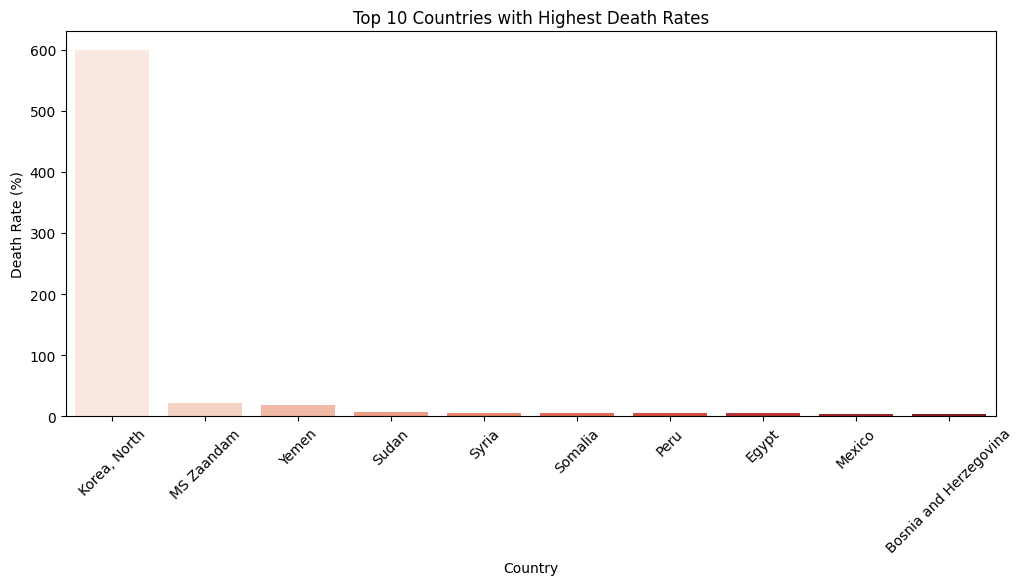

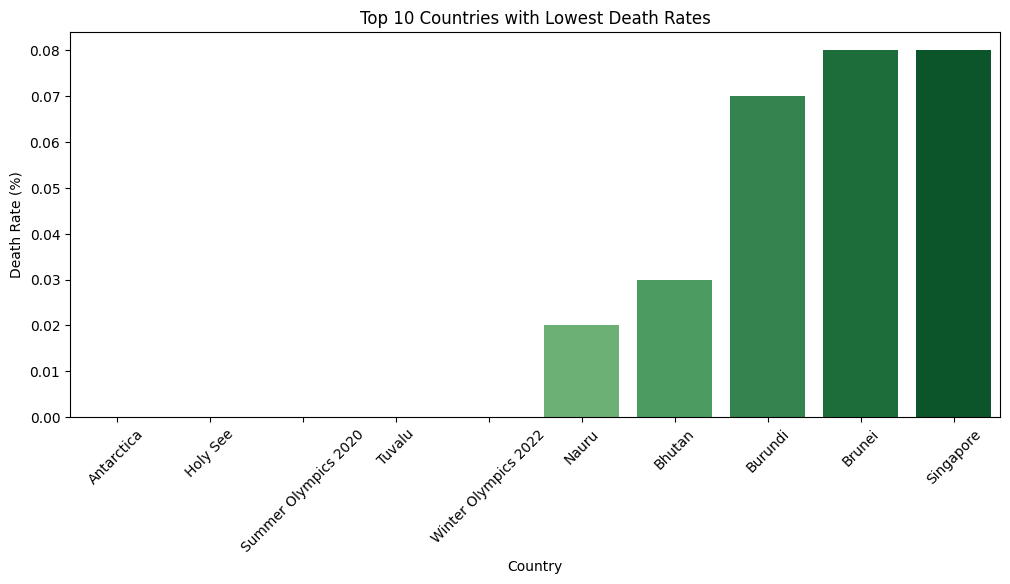

In [45]:
#Top 10 Countries with Highest & Lowest Death Rates
top_10_highest_death_rate = new_df.nlargest(10, 'Death_Rate')
top_10_lowest_death_rate = new_df.nsmallest(10, 'Death_Rate')

plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_highest_death_rate['Country'], y=top_10_highest_death_rate['Death_Rate'], palette='Reds')
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Highest Death Rates")
plt.ylabel("Death Rate (%)")
plt.xlabel("Country")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_lowest_death_rate['Country'], y=top_10_lowest_death_rate['Death_Rate'], palette='Greens')
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Lowest Death Rates")
plt.ylabel("Death Rate (%)")
plt.xlabel("Country")
plt.show()

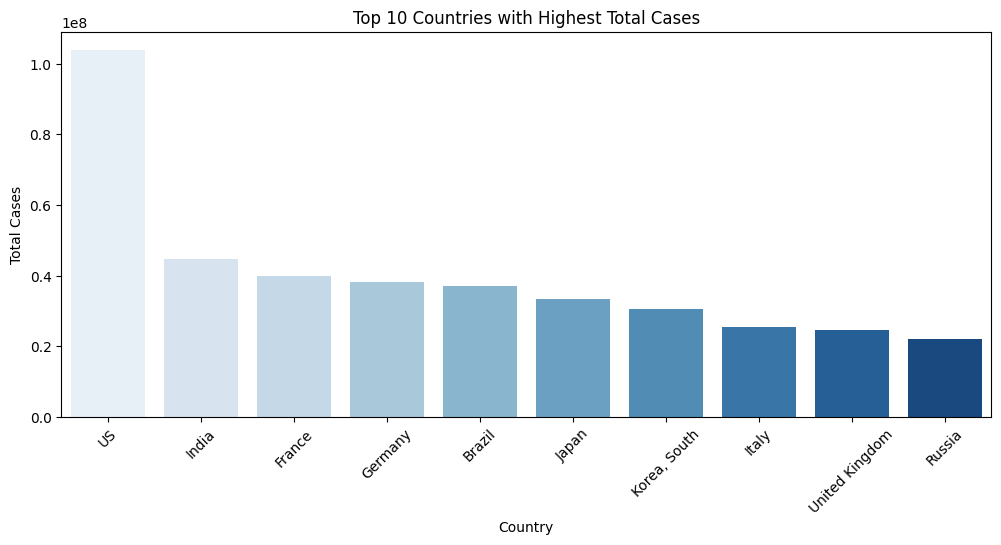

In [43]:
# Remove the "Total" row before sorting
filtered_df = new_df[new_df['Country'] != 'Total']

# Top 10 Countries with Highest Total Cases (using last month's cases)
top_10_cases = filtered_df.nlargest(10, filtered_df.columns[-2])  # Last month's cases column

plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_cases['Country'], y=top_10_cases.iloc[:, -2], palette='Blues')
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Highest Total Cases")
plt.ylabel("Total Cases")
plt.xlabel("Country")
plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extract month names dynamically from column headers
month_columns = [col for col in new_df.columns if '_cases' in col]  # Get all "cases" columns
months = [col.replace('_cases', '') for col in month_columns]  # Remove "_cases" to get month labels

# Extract total cases and total deaths from new_df (last row contains totals)
total_cases = new_df[month_columns].iloc[-1].values  # Take last row for cases
total_deaths = new_df[[col.replace('_cases', '_deaths') for col in month_columns]].iloc[-1].values  # Last row for deaths

# Ensure all lists have the same length
assert len(months) == len(total_cases) == len(total_deaths), "Mismatch in length of data!"

# Create DataFrame
monthly_data = pd.DataFrame({
    'Month': months,
    'Total_Cases': total_cases,
    'Total_Deaths': total_deaths
})

# Display first few rows
print(monthly_data.head())

     Month  Total_Cases  Total_Deaths
0  Jan2020         9927           214
1  Feb2020        86023          2946
2  Mar2020       869371         47218
3  Apr2020      3282087        253486
4  May2020      6183316        406242


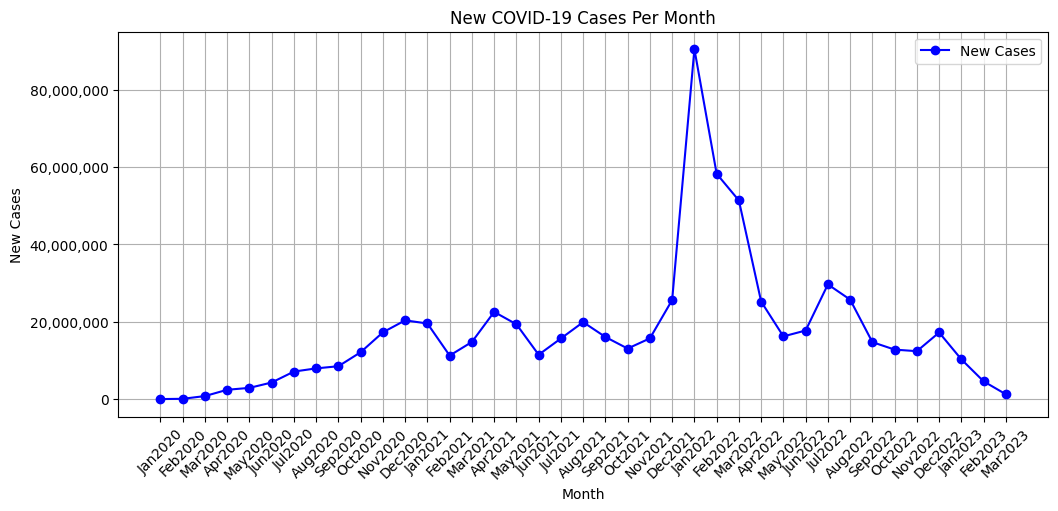

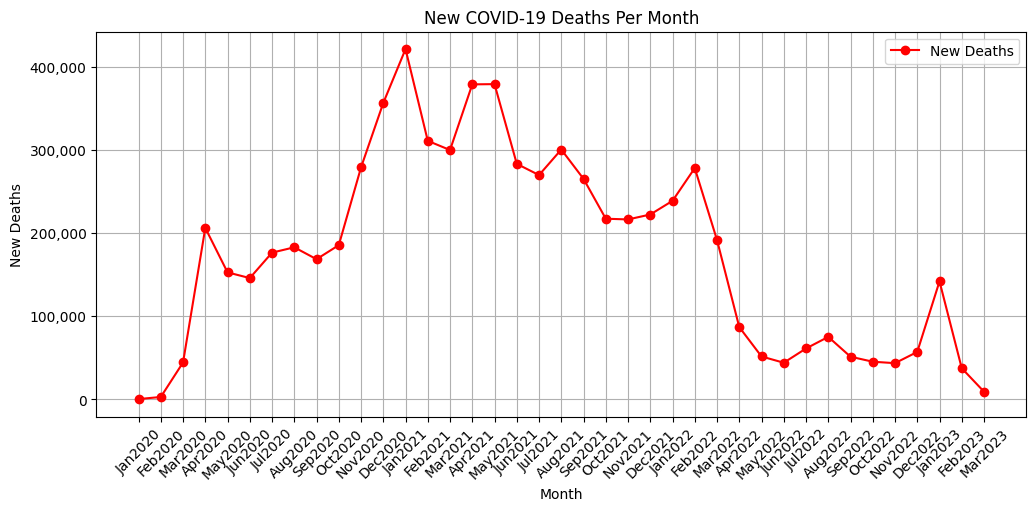

In [59]:
# Convert cumulative values to new values per month
monthly_data['New_Cases'] = monthly_data['Total_Cases'].diff().fillna(monthly_data['Total_Cases'])
monthly_data['New_Deaths'] = monthly_data['Total_Deaths'].diff().fillna(monthly_data['Total_Deaths'])

# Plot new cases per month
plt.figure(figsize=(12, 5))
plt.plot(monthly_data['Month'], monthly_data['New_Cases'], label='New Cases', color='blue', marker='o')
plt.xticks(rotation=45)
plt.title("New COVID-19 Cases Per Month")
plt.ylabel("New Cases")
plt.xlabel("Month")
plt.legend()
plt.grid(True)

# Format y-axis for readability
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# Plot new deaths per month
plt.figure(figsize=(12, 5))
plt.plot(monthly_data['Month'], monthly_data['New_Deaths'], label='New Deaths', color='red', marker='o')
plt.xticks(rotation=45)
plt.title("New COVID-19 Deaths Per Month")
plt.ylabel("New Deaths")
plt.xlabel("Month")
plt.legend()
plt.grid(True)

# Format y-axis for readability
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()



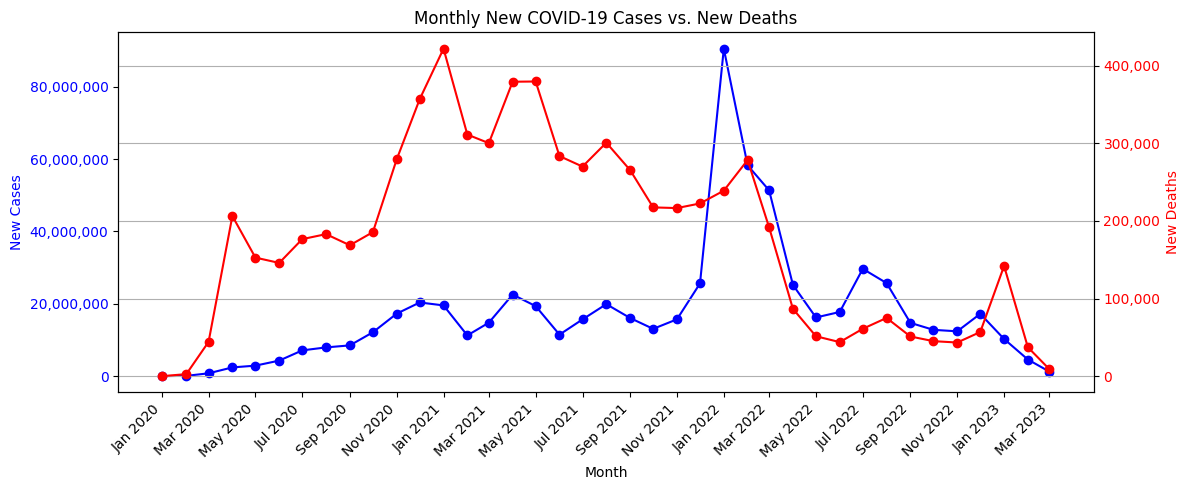

In [99]:

# Ensure 'Month' is properly formatted as datetime
monthly_data['Month'] = pd.to_datetime(monthly_data['Month'], format='%b%Y')

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot New Cases
ax1.set_xlabel("Month")
ax1.set_ylabel("New Cases", color="blue")
ax1.plot(monthly_data['Month'], monthly_data['New_Cases'], label="New Cases", color="blue", marker='o')
ax1.tick_params(axis='y', labelcolor="blue")

# Format the y-axis for better readability
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Plot New Deaths on Secondary Axis
ax2 = ax1.twinx()
ax2.set_ylabel("New Deaths", color="red")
ax2.plot(monthly_data['Month'], monthly_data['New_Deaths'], label="New Deaths", color="red", marker='o')
ax2.tick_params(axis='y', labelcolor="red")

# Format the y-axis for better readability
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# ✅ Fix the X-axis to show readable Month Names
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # Show every 2 months
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# ✅ Force the X-axis to rotate and be readable
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Add Title and Grid
plt.title("Monthly New COVID-19 Cases vs. New Deaths")
fig.tight_layout()
plt.grid(True)

plt.show()



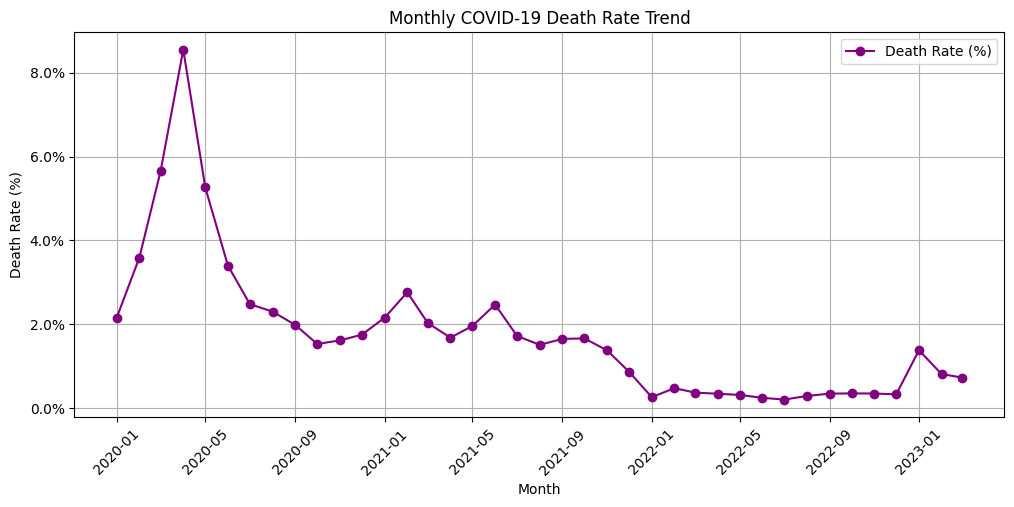

In [83]:
# Calculate Death Rate per Month
monthly_data['Death_Rate'] = (monthly_data['New_Deaths'] / monthly_data['New_Cases']) * 100

plt.figure(figsize=(12, 5))
plt.plot(monthly_data['Month'], monthly_data['Death_Rate'], label="Death Rate (%)", color="purple", marker='o')
plt.xticks(rotation=45)
plt.title("Monthly COVID-19 Death Rate Trend")
plt.ylabel("Death Rate (%)")
plt.xlabel("Month")
plt.legend()
plt.grid(True)

# Format y-axis for better readability
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}%'))

plt.show()


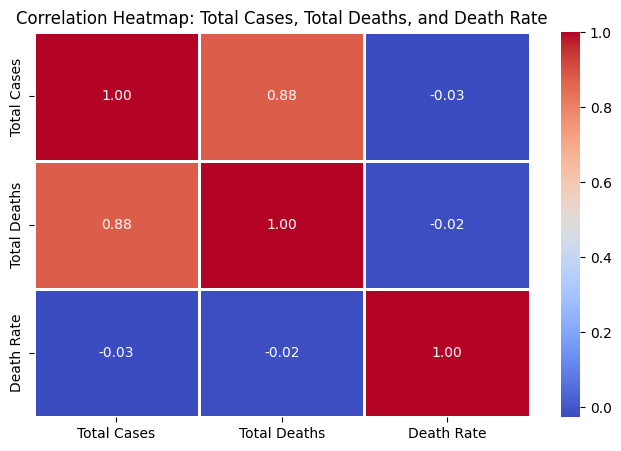

In [81]:

# Load your cleaned dataset
new_df = pd.read_csv("cleaned_covid19_data.csv")

# Extract the last two columns (total cases and total deaths)
total_cases_col = new_df.columns[-2]  # Second last column is total cases
total_deaths_col = new_df.columns[-1]  # Last column is total deaths

# Manually calculate Death Rate since your dataset does not have it
new_df['Death_Rate'] = (new_df[total_deaths_col] / new_df[total_cases_col]) * 100

# Create a new DataFrame with Total Cases, Total Deaths, and Death Rate
correlation_data = new_df[[total_cases_col, total_deaths_col, 'Death_Rate']]

# Rename the columns for better display
correlation_data.columns = ['Total Cases', 'Total Deaths', 'Death Rate']

# Calculate the correlation
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

# Add a title
plt.title('Correlation Heatmap: Total Cases, Total Deaths, and Death Rate', fontsize=12)
plt.show()


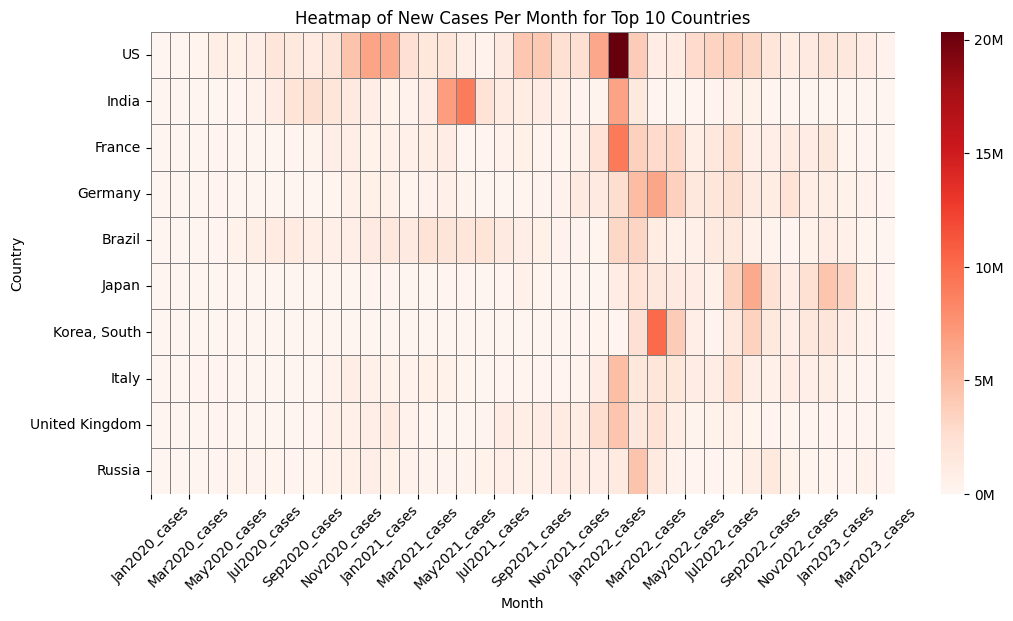

In [95]:

# Select only the monthly cases columns
monthly_case_cols = [col for col in new_df.columns if '_cases' in col]

# Get top 10 countries (excluding "Total" row)
top_10_countries = new_df[new_df['Country'] != 'Total'].nlargest(10, monthly_case_cols[-1])

# Compute new cases per month (difference)
monthly_new_cases = top_10_countries[monthly_case_cols].diff(axis=1).fillna(top_10_countries[monthly_case_cols])

# Plot the heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(monthly_new_cases.set_index(top_10_countries['Country']), 
                      cmap="Reds", annot=False, linewidths=0.5, linecolor='gray')

# Fix the x-axis labels for readability
plt.xticks(ticks=range(0, len(monthly_case_cols), 2), 
           labels=[monthly_case_cols[i] for i in range(0, len(monthly_case_cols), 2)], 
           rotation=45)

# Convert the colorbar to Millions (M) instead of large numbers
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0, 5e6, 10e6, 15e6, 20e6])
colorbar.set_ticklabels(['0M', '5M', '10M', '15M', '20M'])

# Add titles and labels
plt.ylabel("Country")
plt.xlabel("Month")
plt.title("Heatmap of New Cases Per Month for Top 10 Countries")
plt.show()


In [93]:
# Save the final cleaned and processed dataset to a CSV file
new_df.to_csv("cleaned_covid19_data.csv", index=False)

print("✅ Final cleaned dataset saved successfully as 'cleaned_covid19_data.csv'")

✅ Final cleaned dataset saved successfully as 'cleaned_covid19_data.csv'
